**Proyek mini: Analisis Eksplorasi Data Restoran "Tips"**

**menerapkan library seaborn yang telah dipelajari!**

**Latar Belakang:** 

**Anda adalah seorang analis data di sebuah restoran. Manajemen ingin memahami perilaku pelanggan: Apa saja faktor yang memengaruhi besarnya tip? Kapan waktu paling ramai? Adakah perbedaan antara perokok dan bukan perokok?**

---

**Dataset: Gunakan dataset tips yang sudah ada di Seaborn.**


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

#load dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


---

**1: Eksplorasi Awal**

- Distribusi Pelanggan:
    - Buat countplot untuk melihat perbandingan jumlah pelanggan berdasarkan hari (day).
    - Gunakan hue pada plot di atas untuk melihat juga perbandingan jenis kelamin (sex) di setiap harinya.

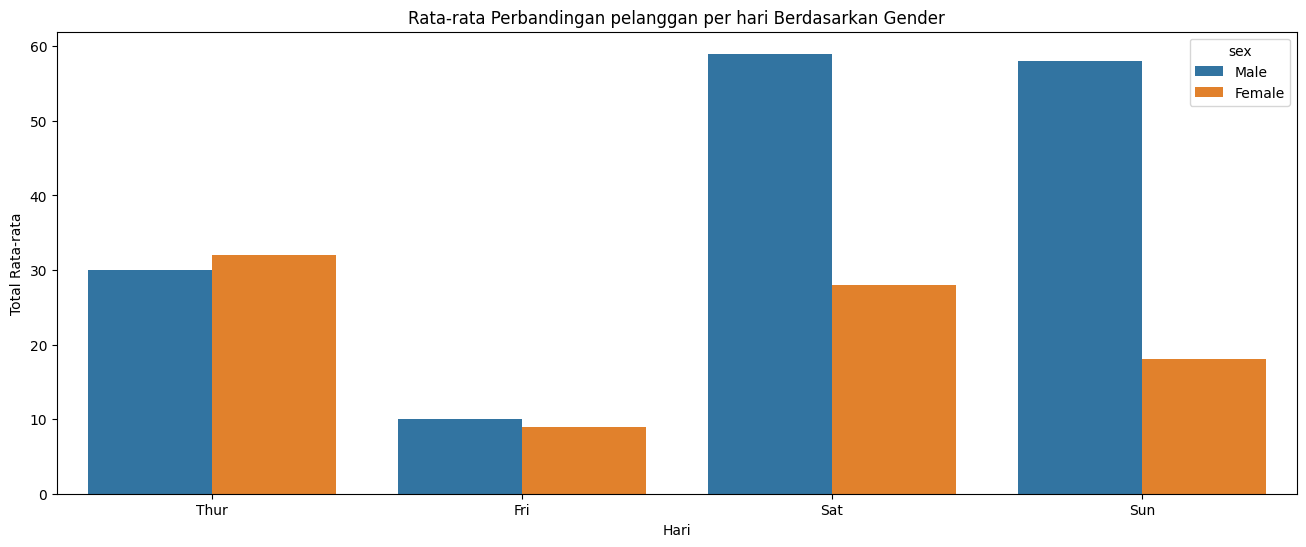

In [19]:

plt.figure(figsize=(16, 6))
sns.countplot(x='day', 
              data=tips,
              hue='sex')
plt.title("Rata-rata Perbandingan pelanggan per hari Berdasarkan Gender")
plt.xlabel('Hari')
plt.ylabel('Total Rata-rata')

plt.show()


---

**2: Menganalisis Hubungan Antar Variabel**

- Hubungan Total Tagihan dengan Tip:

    - Buat sebuah scatterplot (relplot dengan kind="scatter") untuk melihat hubungan antara total_bill (sumbu x) dan tip (sumbu y).
    - Pada plot yang sama, gunakan hue untuk membedakan antara perokok (smoker) dan bukan perokok.
    - Selanjutnya, gunakan style untuk membedakan waktu makan (time, yaitu Lunch atau Dinner).
    - Analisis: Dari plot gabungan ini, kelompok pelanggan mana (misalnya: perokok saat makan malam) yang tampaknya memberikan tip lebih tinggi seiring kenaikan total tagihan?

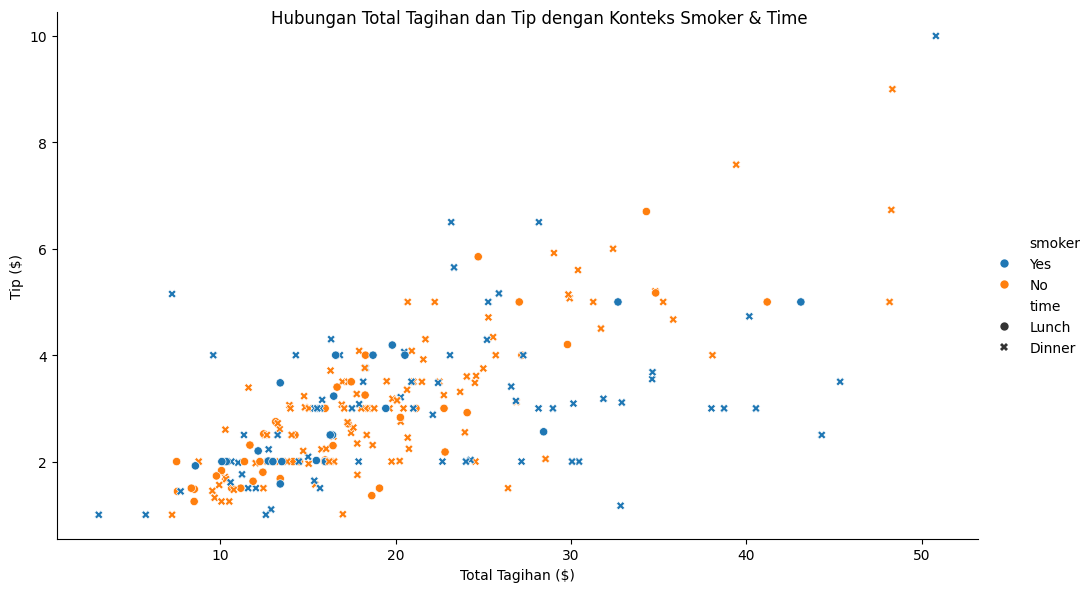

In [21]:
plot = sns.relplot(data=tips,
            x='total_bill',
            y='tip',
            hue='smoker',
            style='time',
            kind='scatter',
            height=6,
            aspect=10/6)

plot.set_axis_labels('Total Tagihan ($)', 'Tip ($)')
plot.fig.suptitle("Hubungan Total Tagihan dan Tip dengan Konteks Smoker & Time")


plt.show()


**Perokok pada saat dinner memberikan tips lebih banyak pada saat tagihan bill sangat tinggi**

----

**3: Membandingkan Performa Antar Kategori**

- Distribusi Tagihan per Hari:
    - Buat box plot (catplot dengan kind="box") untuk membandingkan distribusi total_bill di setiap hari (day).
    - Analisis: Hari apa yang memiliki median tagihan tertinggi? Hari apa yang memiliki rentang tagihan (variasi) paling lebar?

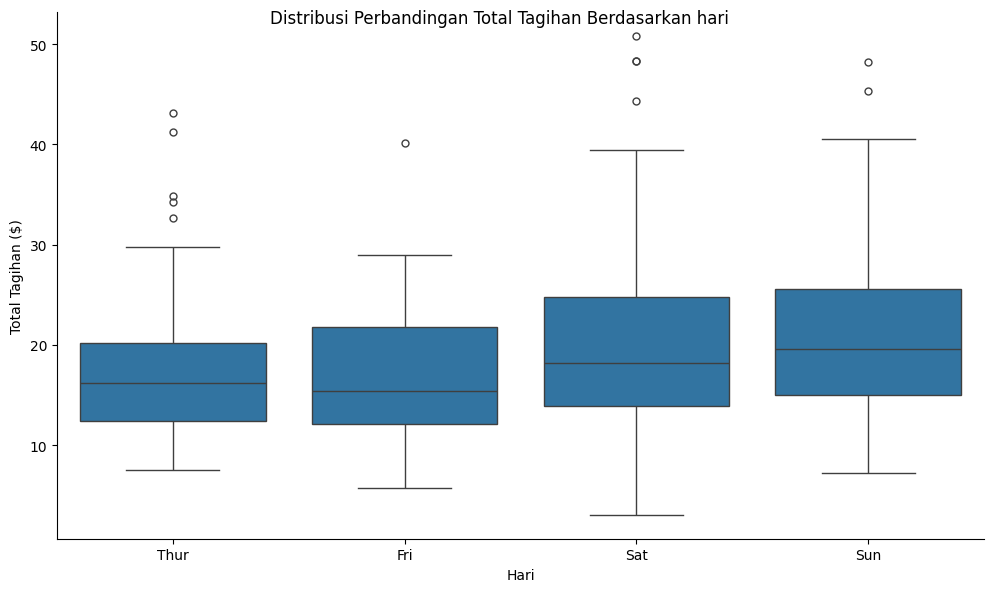

In [22]:
plot2 = sns.catplot(kind='box', 
            data=tips, 
            x='day', 
            y='total_bill',
            height=6,
            aspect=10/6)

plot2.set_axis_labels('Hari', 'Total Tagihan ($)')
plot2.fig.suptitle('Distribusi Perbandingan Total Tagihan Berdasarkan hari')

plt.show()

**median tagihan tertinggi berada pada hari minggu dan rentang variasi terlebar hari sabtu dan outlier tertingg ada di hari sabtu dan minggun**

- Rata-rata Tip Berdasarkan Waktu dan Status Merokok:

    - Buat point plot (catplot dengan kind="point") untuk membandingkan rata-rata tip berdasarkan waktu makan (time) pada sumbu x.
    - Gunakan hue untuk memisahkan antara perokok dan bukan perokok.
    - Analisis: Apakah perokok cenderung memberikan tip rata-rata lebih tinggi atau lebih rendah dibandingkan bukan perokok, baik saat makan siang maupun makan malam?

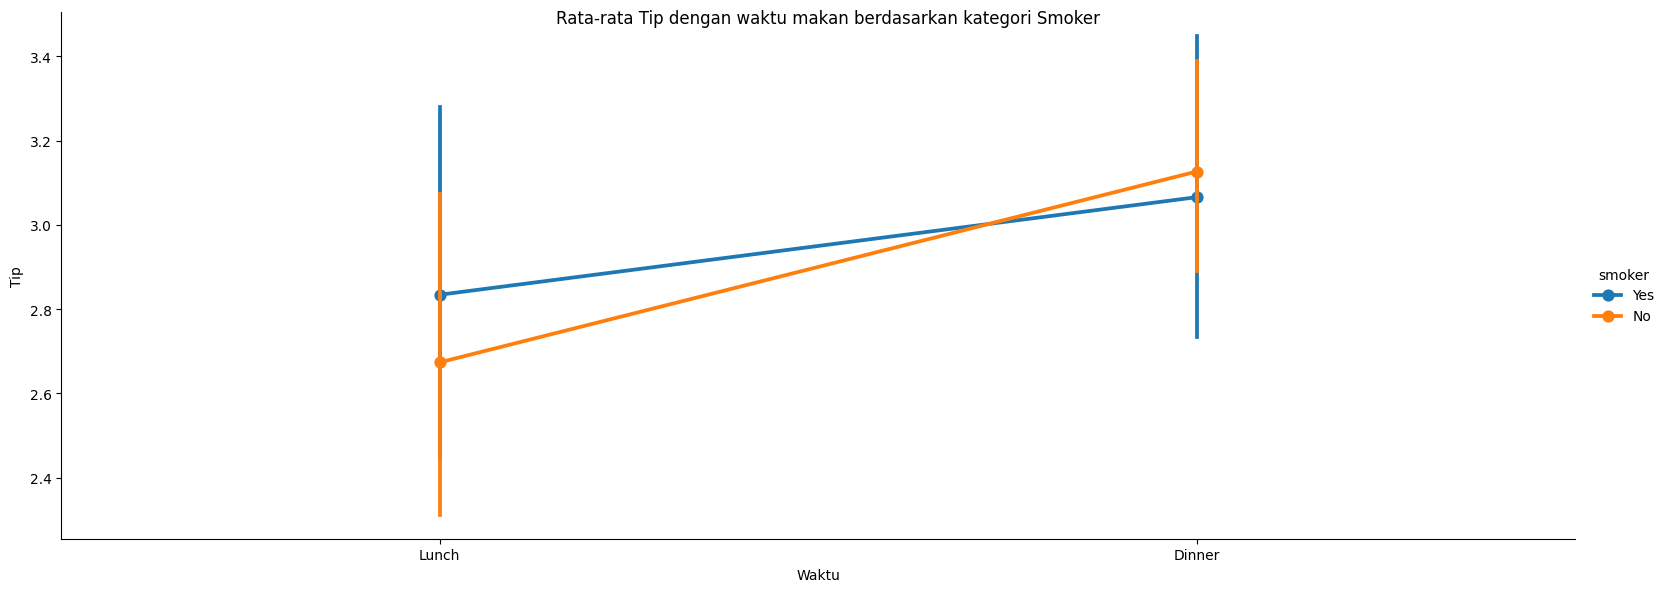

In [24]:
plot3 = sns.catplot(kind='point',
            x='time',
            y='tip',
            data=tips,
            hue='smoker',
            height=6,
            aspect=16/6)

plot3.set_axis_labels('Waktu', 'Tip')
plot3.fig.suptitle('Rata-rata Tip dengan waktu makan berdasarkan kategori Smoker')

plt.show()

**Tidak ada perbedaan signifikan antara tip smoker dan Non-smoker, meskipun ada kecenderungan smoker memberi tip lebih besar saat lunch dan Non-Smoker saat dinner**

---
